**Plagiarism Policy**

NUS takes a strict view of plagiarism and considers it a serious form of academic dishonesty. Any student found to have engaged in such misconduct will be subjected to disciplinary action by the University. Please refer to the NUS Plagiarism Policy.

For assignments in BT4222, using any AI tools to generate code is not allowed. Sharing any part of the solution among students is not allowed either. Following the recently concluded plagiarism cases, if assignments were caught with a high degree of similarity, the presumption of guilt is applied when no hard evidence can be provided by the suspect.  


# BT4222 Assignment 2 (10 marks)
- Question 1: Explore the `Breast Cancer` dataset, train Random Forest, Logistic  Regression and SVM classifiers on it. (**4 Marks**)
- Question 2: Build a sentiment analyzer using the Naive Bayes algorithm on dataset `Amazon_review_20220923.txt` (**6 Marks**)
- Submit this .ipynb file to: Canvas > Assignments > Assignment 2
- Please use your NUS userID as the filename, i.e., "A0123456X.ipynb"

# Question 1 (4 Marks)
Train Random Forest, Logistic Regression and SVM classifiers on the `Breat Cancer` dataset.

### Task 1.1 Data Exploration(**0.5 mark**)
Please load the dataset **'Breast Cancer'** from `sklearn.datasets` and perform an exploration of the Breast Cancer dataset. This includes analyzing the correlations between features and applying Principal Component Analysis (PCA) for data dimensionality reduction. We provide the code for PCA, so you only need to load the dataset and show the correlation matrix.

- PCA is a statistical technique used in the field of data science and machine learning for the purpose of dimensionality reduction, while preserving as much of the data's variation as possible. You can know more from [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis). The scatter plot of the first two principal components can reveal interesting data patterns. The package refers to this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

- **Hint**: Use `sns.heatmap` for visualizing the correlation matrix

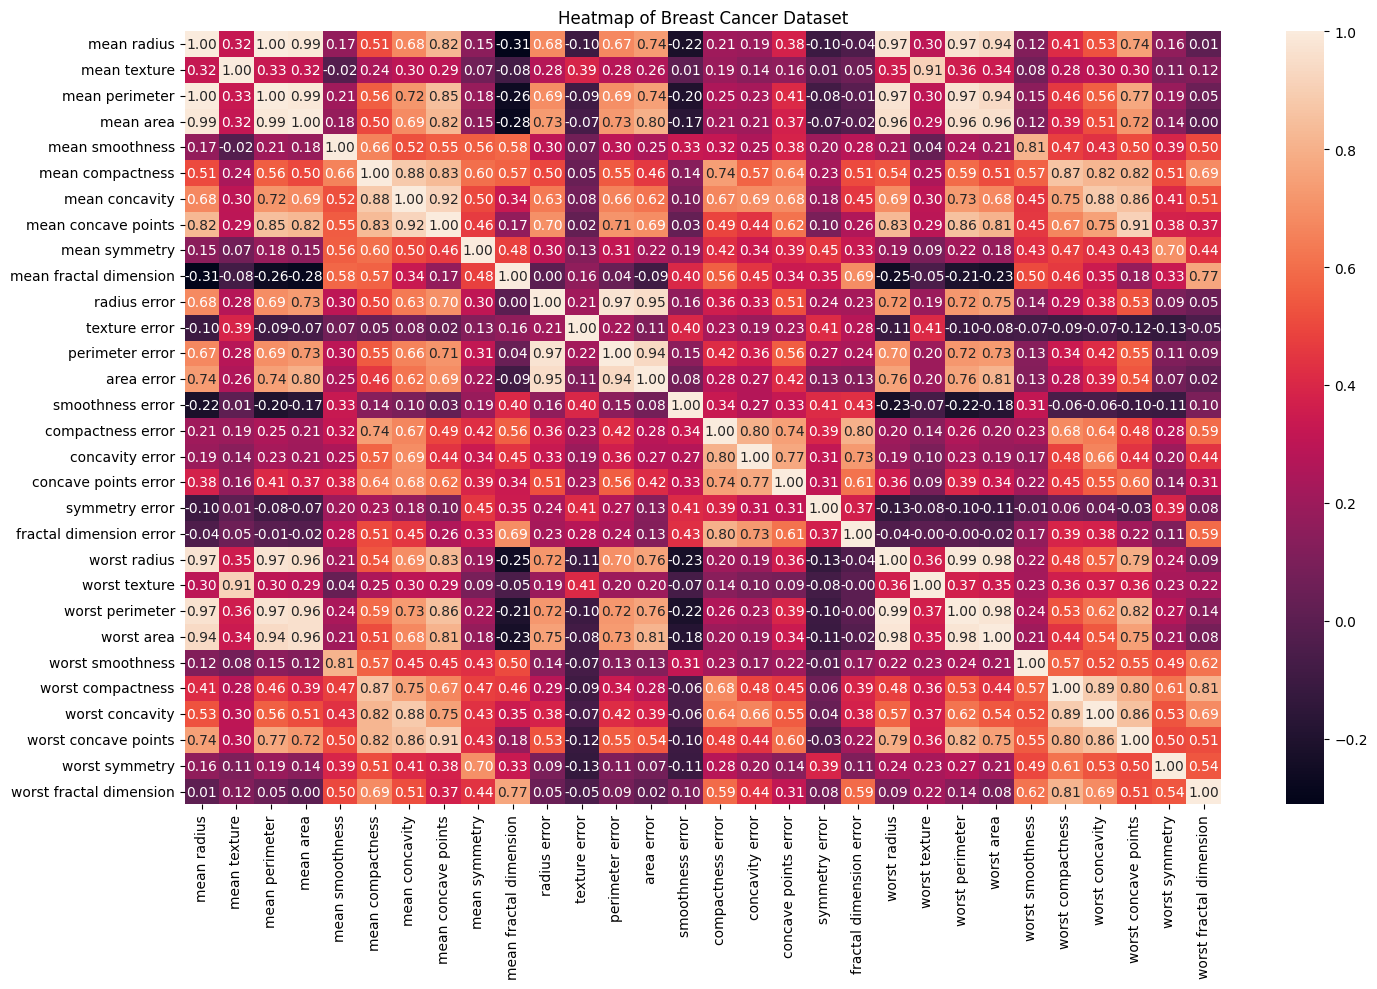

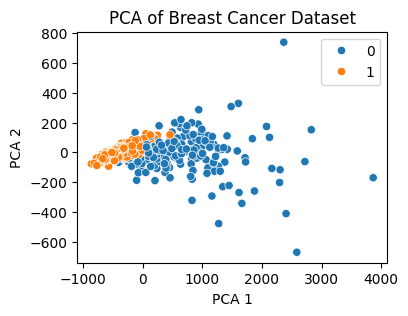

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Data Exploration (0.5 mark)
'''YOUR CODE HERE'''
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = cancer.target

corr = data.corr()
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap of Breast Cancer Dataset')
plt.tight_layout()
plt.show()

# PCA for data dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(4, 3))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cancer.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

### Task 1.2 Data Splitting (**0.5 Mark**)

Now we prepare the dataset for training and testing:

- Split the two datasets into training and test sets using Stratified Sampling(0.3 Mark)
- Explain why stratified sampling might be more appropriate than random sampling in this context(0.2 Mark)

**Hint**: `StratifiedShuffleSplit` from `sklearn.model_selection` can be used for this purpose. Consider the distributions of target classes when discussing the benefits of stratified sampling.

In [2]:
### Data Splitting (0.5 marks)
'''YOUR CODE HERE'''
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target[train_index], target[test_index]

In [3]:
# Printing value count in original, train and test set
print("Value counts in original dataset: ")
print(pd.Series(target).value_counts(normalize=True))
print("Value counts in train set: ")
print(pd.Series(y_train).value_counts(normalize=True))
print("Value counts in test set: ")
print(pd.Series(y_test).value_counts(normalize=True))

Value counts in original dataset: 
1    0.627417
0    0.372583
dtype: float64
Value counts in train set: 
1    0.626374
0    0.373626
dtype: float64
Value counts in test set: 
1    0.631579
0    0.368421
dtype: float64


### Your answer - the benefits of stratified sampling:
There is class imbalance in the original dataset, with over 60% of the data points belonging to Class 1 while less than 40% belongs to Class 0. If we do a conventional 80-20 split, this might result in a disproportionately large number of Class 1 data points being in the train set, and the train set may be trained too much on Class 1 data, making in unrepresentative of Class 0 data (model becomes skewed). Hence I use stratified sampling to ensure that there is a relatively similar proportion in the train and test set as compared to the original dataset.

### Task 1.3 Logistic Regression (**0.5 Mark**)
Implement Logistic Regression models on the dataset with L1 and L2 regularization respectively. Train with the training set, then evaluate the two models performance on the testset. Show the accuracy and confusion matrix in your outcome.

**Hint**: Use LogisticRegression with penalty parameters set to 'l1' and 'l2', respectively. You might need to adjust the solver and max_iter parameter for better convergence.

In [4]:
### Logistic Regression (0.5 marks)
'''YOUR CODE HERE'''
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L1 penalty
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=0)
lr_l1.fit(X_train, y_train)

# Logistic Regression with L2 penalty
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=0)
lr_l2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [5]:
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

Accuracy of Logistic Regression Model with L1 penalty: 0.9474
Accuracy of Logistic Regression Model with L2 penalty: 0.9474


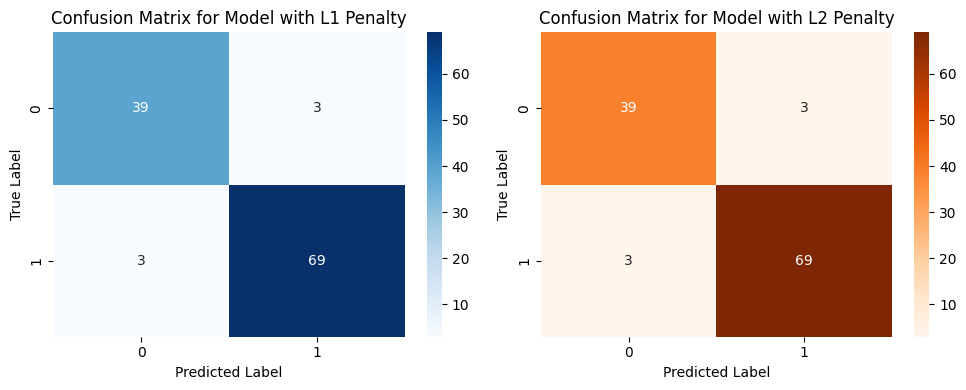

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Displaying accuracy and confusion matrix
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f"Accuracy of Logistic Regression Model with L1 penalty: {accuracy_l1:.4f}")
print(f"Accuracy of Logistic Regression Model with L2 penalty: {accuracy_l2:.4f}")

cm_l1 = confusion_matrix(y_test, y_pred_l1)
cm_l2 = confusion_matrix(y_test, y_pred_l2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.ravel()

# Confusion matrix for L1 penalty
sns.heatmap(cm_l1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for Model with L1 Penalty")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Confusion matrix for L2 penalty
sns.heatmap(cm_l2, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix for Model with L2 Penalty")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Task 1.4 SVM (**1 Mark**)

- Train SVM models with 3 different kernels (linear, RBF, and polynomial) on the Breast Cancer dataset. Train with the training set, then evaluate the three models performance on the testset respectively. Show the accuracy and confusion matrix in your outcome for each model(**0.7 mark**)

- Compare their performance and explore the impact of different kernels. (**0.3 Mark**)

**Hint**: Utilize `SVC` from `sklearn.svm` and experiment with different kernel parameters. Consider the nature of each kernel and how it might fit the data.



In [7]:
### SVM (1 mark)
'''YOUR CODE HERE'''
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=0)
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_poly = SVC(kernel='poly', degree=3, random_state=0)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

Accuracy with Linear Kernel: 0.9561
Accuracy with RBF Kernel: 0.9123
Accuracy with Polynomial Kernel: 0.9035


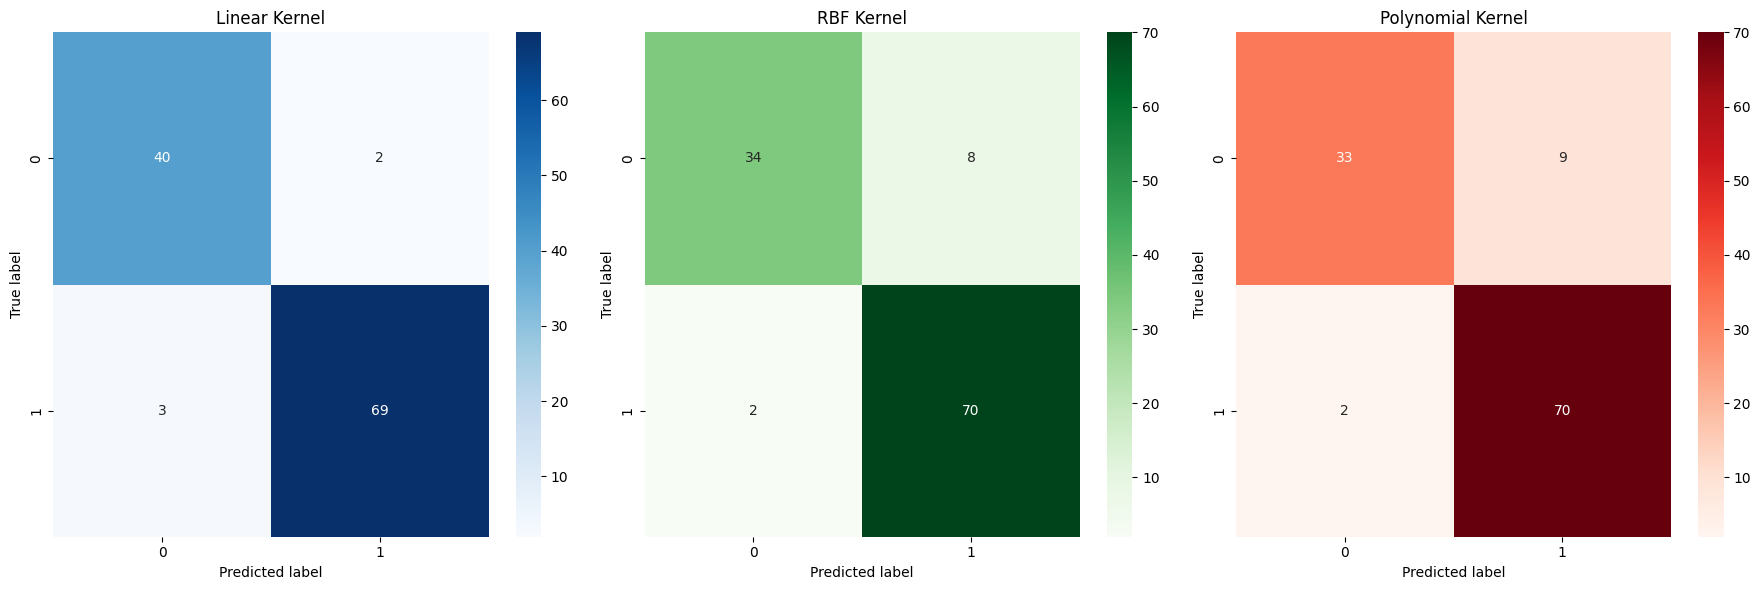

In [8]:
accuracy_linear = accuracy_score(y_test, svm_linear.predict(X_test))
accuracy_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))
accuracy_poly = accuracy_score(y_test, svm_poly.predict(X_test))

print(f"Accuracy with Linear Kernel: {accuracy_linear:.4f}")
print(f"Accuracy with RBF Kernel: {accuracy_rbf:.4f}")
print(f"Accuracy with Polynomial Kernel: {accuracy_poly:.4f}")

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)

cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
cm_poly = confusion_matrix(y_test, y_pred_poly)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Linear Kernel Confusion Matrix
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Linear Kernel")
ax[0].set_xlabel("Predicted label")
ax[0].set_ylabel("True label")

# RBF Kernel Confusion Matrix
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("RBF Kernel")
ax[1].set_xlabel("Predicted label")
ax[1].set_ylabel("True label")

# Polynomial Kernel Confusion Matrix
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Reds", ax=ax[2])
ax[2].set_title("Polynomial Kernel")
ax[2].set_xlabel("Predicted label")
ax[2].set_ylabel("True label")

plt.tight_layout()
plt.show()

### Your answer - Compare different kernels:

### Task 1.5 Data Scaler (**0.7 Mark**)
Now let's try to increase the prediction accuracy. Please try to scale the data in two different ways and then apply the scaled data to the SVM again (you can choose which kernel to use as long as they have appeared in task 1.4) and report the accuracy rate and the confusion matrix of applying the prediction model on the same test set.

- **Hint**: You can use the scaler from `sklearn.preprocessing` like `StandardScaler` to scale the input (X_train and X_test). No need to scale Y_train and Y_test. For each scaler method, please train a new model.

In [9]:
### Data Scaler (0.7 mark)
'''YOUR CODE HERE'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
X_train_std_scaled = standard_scaler.fit_transform(X_train)
X_test_std_scaled = standard_scaler.transform(X_test)

minmax_scaler = MinMaxScaler()
X_train_mm_scaled = minmax_scaler.fit_transform(X_train)
X_test_mm_scaled = minmax_scaler.transform(X_test)

In [10]:
# Training model for each scaler method using kernal = linear
svm_std_scaled = SVC(kernel='linear', degree=3, random_state=0)
svm_std_scaled.fit(X_train_std_scaled, y_train)

svm_mm_scaled = SVC(kernel='linear', degree=3, random_state=0)
svm_mm_scaled.fit(X_train_mm_scaled, y_train)

SVC(kernel='linear', random_state=0)

Accuracy with Linear Kernel: 0.9825
Accuracy with RBF Kernel: 0.9737


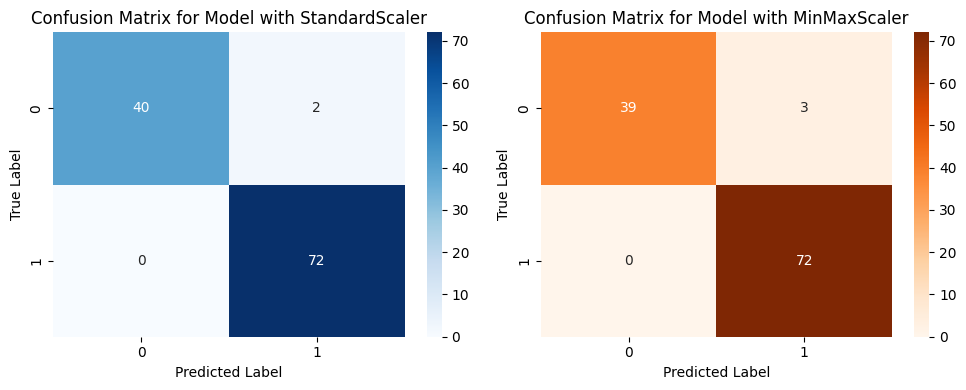

In [11]:
# Reporting accuracy and confusion matrix for scaled outputs
accuracy_std_scaled = accuracy_score(y_test, svm_std_scaled.predict(X_test_std_scaled))
accuracy_mm_scaled = accuracy_score(y_test, svm_mm_scaled.predict(X_test_mm_scaled))

print(f"Accuracy with Linear Kernel: {accuracy_std_scaled:.4f}")
print(f"Accuracy with RBF Kernel: {accuracy_mm_scaled:.4f}")

y_pred_std_scaled = svm_std_scaled.predict(X_test_std_scaled)
y_pred_mm_scaled = svm_mm_scaled.predict(X_test_mm_scaled)

cm_std_scaled = confusion_matrix(y_test, y_pred_std_scaled)
cm_mm_scaled = confusion_matrix(y_test, y_pred_mm_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.ravel()

sns.heatmap(cm_std_scaled, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for Model with StandardScaler")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_mm_scaled, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix for Model with MinMaxScaler")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### Task 1.6 Random Forest (**0.3 Mark**)
Train a random forest model on the Breast Cancer dataset (you can choose whether to use scale method or not). Train with the training set, then evaluate model performance on the test set. Show the accuracy and confusion matrix in your outcome.

In [12]:
### Random Forest (0.3 mark)
'''YOUR CODE HERE'''
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Accuracy of Random Forest classifier: 0.9474


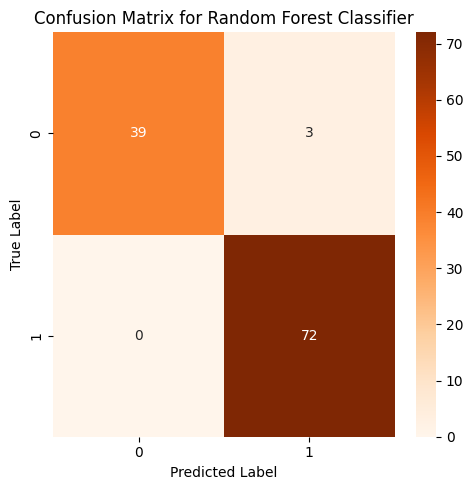

In [13]:
rfc_y_pred = random_forest.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
print(f"Accuracy of Random Forest classifier: {rfc_accuracy:.4f}")

plt.figure(figsize=(5, 5))
cm_rfc = confusion_matrix(y_test, rfc_y_pred)
sns.heatmap(cm_mm_scaled, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

### Task 1.7 Model Optimization (**0.5 Mark**)

Please tune the hyperparameters ("n_estimators","max_depth" and "min_samples_split") in the RF classifier by doing a grid search with cross validation. After that, please report the hyperparameters that were chosen by the search. Then use the best estimator to make predictions on the test set and report the accuracy.

- **Hint:** You can use **GridSearchCV** for the cross validation. Please ensure that each hyperparameter to be tuned has no fewer than three possible values when setting param_distributions.

- `GridSearchCV` should be conducted on the training set because its purpose is to select the best hyperparameters for the model using cross-validation while avoiding data leakage from the test set.

In [14]:
### Model Optimization (0.5 mark)
'''YOUR CODE HERE'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10]
}

# Initialise RFC with no hyperparams
rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score (accuracy): {:.4f}".format(grid_search.best_score_))

Best hyperparameters: {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 50}
Best cross-validation score (accuracy): 0.9736


In [15]:
# Use the best hyperparameters to train
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy of the best model: {:.4f}".format(test_accuracy))

Test set accuracy of the best model: 0.9561


# Question 2  (6 Marks)
Build a sentiment analyzer using the Naive Bayes algorithm.
the dataset file "Amazon_review_20220923.txt" contains a list of product name, customer reviews and each review is assigned a sentiment score, with 0 representing negative sentiment and 1 representing positive sentiment.

### Task 2.1 Data Import (**0.25 Mark**)
Please import the raw data into a DataFrame and separate the columns. Make the columns that contain product name and text reviews as the features, and distinguish the column containing sentiment labels as the target. Then split the data into training and testing sets (ratio 3:1)

In [16]:
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split

# Download the dataset
file_id = '1-tg_fgDjXTx9a5RGK76nCE0c7qqdFhkA'
url = f'https://drive.google.com/uc?id={file_id}'
output = "Amazon_review.txt"
gdown.download(url, output, quiet=False)

data = pd.read_csv("Amazon_review.txt", sep='\t')
data.head()
### Data Load and Split (0.25 mark)
'''YOUR CODE HERE'''
X = data[['product', 'text']]
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Downloading...
From: https://drive.google.com/uc?id=1-tg_fgDjXTx9a5RGK76nCE0c7qqdFhkA
To: /content/Amazon_review.txt
100%|██████████| 4.47M/4.47M [00:00<00:00, 203MB/s]


**Note:**
If you are unable to download the dataset from the remote Google Drive, here is the version in which you will load the datasets from your own Google Drive folder. To do so, you need to first find and download the datasets from BT4222 Canvas-->Files-->Week6-->Assignment 2; and then upload "Amazon_review.txt" into your own Google drive folder. The rest of the requirement is the same as the original version using gdown.download().

### Task 2.2 NER (**0.25 Mark**)

Named Entity Recognition could be useful in some NLP tasks. For example, in sentiment analysis, Named Entity Recognition (NER) can play a role by identifying specific entities in text, enabling more targeted and accurate emotion interpretation related to those entities. Here we try a basic NER tool.

We first install the spacy, then please select 10 reviews from the dataset you just imported, perform a basic Named Entity Recognition (NER) on them, and print out the chosen reviews along with the recognized entities and label.

- **Hint**: you can use `en_core_web_sm` in spacy. Create an `nlp` object for each review, then you can retrieve the text and label of each entity contained in the review text. Here is an example [link](https://towardsdatascience.com/named-entity-recognition-ner-using-spacy-nlp-part-4-28da2ece57c6).

In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

### NER (0.25 mark)
nlp = spacy.load('en_core_web_sm')
texts = X_test['product'][51:60] # selecting 10 reviews

'''YOUR CODE HERE'''
results = []

for review in nlp.pipe(texts):
    entities = []
    for entity in review.ents:
        # Append review text and label
        entities.append((entity.text, entity.label_))
    results.append((review.text, entities))

for review, entities in results:
    print("Review:", review)
    print("Entities-label pairs:", entities)
    print("-"*10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Review: Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers
Entities-label pairs: [('Fire Tablet', 'PERSON'), ('Alexa', 'ORG'), ('16', 'CARDINAL'), ('GB', 'GPE'), ('Special Offers', 'ORG')]
----------
Review: AmazonBasics AAA Performance Alkaline Batteries (36 Count)
Entities-label pairs: [('AmazonBasics AAA Performance Alkaline Batteries', 'ORG'), ('36', 'CARDINAL')]
----------
Review: Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case
Entities-label pairs: [('16', 'CARDINAL'), ('GB', 'GPE'), ('Blue Kid-Proof Case', 'ORG')]
----------
Revi

### Task 2.3 Data Preprocessing (**0.5 Mark**)
Please perform key preprocessing steps on the training and test text data such as tokenization, stop word removal, and then transform word counts into their respective tf-idf values.
- **Hint:** For the preprocessing step, you can use the command **CountVectorizer** and **TfidfTransformer** in sklearn, and they provide the built-in configuration to remove the stopwords.
- Please notice that we only use `text` column here. The `product` will be reserved until task 2.8

In [18]:
### Data Preprocessing (0.5 mark)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

'''YOUR CODE HERE'''
data_prep_pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
])
X_train_tfidf = data_prep_pipeline.fit_transform(X_train['text'])
X_test_tfidf = data_prep_pipeline.transform(X_test['text'])

### Task 2.4 Naive Bayes (**0.25 Mark**)
Please import the MultinomialNaive Bayes class from sklearn's naive_bayes module and fit the training
data to the model. Then please obtain the predicted sentiment values from the classifier for the training set and test set respectively.
- **Hint:** You only need to fit one model based on the training data.

In [19]:
### Naive Bayes (0.25 mark)
'''YOUR CODE HERE'''
from sklearn.naive_bayes import MultinomialNB

multnom = MultinomialNB()
multnom.fit(X_train_tfidf, y_train)
# Predicted sentiment values for train and test set
y_train_pred = multnom.predict(X_train_tfidf)
y_test_pred = multnom.predict(X_test_tfidf)

### Task 2.5 Model Performance (**1 Mark**)
Calculate the **accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test. (**0.3 Mark**)

For the prediction of test set, please report the total number of correct predictions according to the confusion_matrix and the accuracy rate. (**0.7 Mark**)

- **Hint:** [This link](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

Training Metrics:
Accuracy: 0.9429
Precision: 0.9425
Recall: 0.9994
ROC_AUC: 0.9694
----------
Test Metrics:
Accuracy: 0.9341
Precision: 0.9336
Recall: 0.9998
ROC_AUC: 0.9566


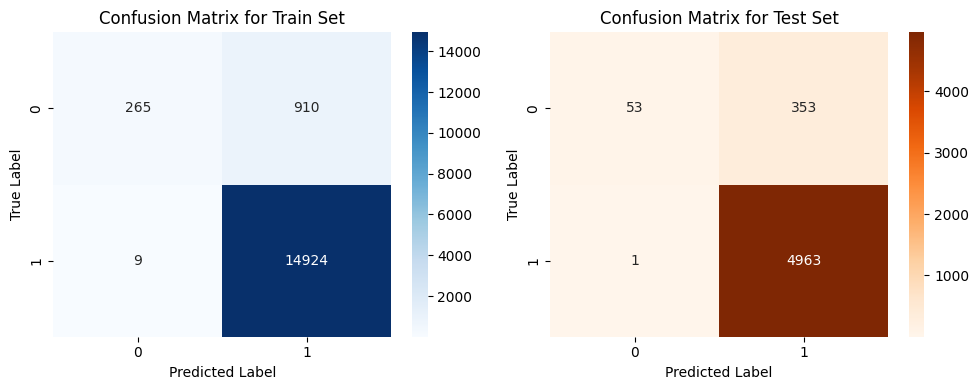

In [20]:
### Model Performance (1 mark)
'''YOUR CODE HERE'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary')
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_roc_auc = roc_auc_score(y_train, multnom.predict_proba(X_train_tfidf)[:, 1])
train_cm = confusion_matrix(y_train, y_train_pred)
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"ROC_AUC: {train_roc_auc:.4f}")

# Test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_roc_auc = roc_auc_score(y_test, multnom.predict_proba(X_test_tfidf)[:, 1])
test_cm = confusion_matrix(y_test, y_test_pred)
print("-"*10)
print("Test Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"ROC_AUC: {test_roc_auc:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.ravel()

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for Train Set")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix for Test Set")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [21]:
37+4987

5024

### Your answer
- The total number of correct predictions according to the confusion_matrix:37 + 4987 = 5042
- The accuracy rate: 93.56%

### Task 2.6 Result Analysis (**1 Mark**)
Determine the top 10 tokens that exhibit the highest predictive power for positive reviews,(**0.5 Mark**) as well as the top 10 tokens that exhibit the highest predictive power for negative reviews.(**0.5 Mark**)

- **Hint:** Naive Bayes automatically counts the number of times called refreach token appears in each class, as well as the number of samples in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object. The tokens that has the highest predictive power for **positve reviews** are those that appear most frequently in positive reviews compared to their frequency in negative reviews, which could be represented as a ratio `(A token's frequency ratio in positive reviews/its frequency ratio in negative reviews)`.

- A token's frequency ratio in positive (or negative) reviews refers to its `feature_count_` over the `class_count_` for the class of positive (or negative) reviews.

- Some form of smoothing may be applied to handle cases where a token is absent in either category.

In [22]:
### Result Analysis (1 mark)
'''YOUR CODE HERE'''
import numpy as np

feature_names = np.array(data_prep_pipeline.named_steps['vect'].get_feature_names_out())

# Add 1 for smoothing to avoid division by zero error
positive_ratios = (multnom.feature_count_[1] + 1) / (multnom.class_count_[1] + 1)
negative_ratios = (multnom.feature_count_[0] + 1) / (multnom.class_count_[0] + 1)

# Calculate ratios to determine top 10
ratio_positive_to_negative = positive_ratios / negative_ratios
ratio_negative_to_positive = negative_ratios / positive_ratios
top_positive_tokens = feature_names[np.argsort(ratio_positive_to_negative)[-10:]]
top_negative_tokens = feature_names[np.argsort(ratio_negative_to_positive)[-10:]]

print(f"Top 10 tokens for positive reviews: {top_positive_tokens}")
print(f"Top 10 tokens for negative reviews: {top_negative_tokens}")

Top 10 tokens for positive reviews: ['grandson' 'beat' 'price' 'easy' 'love' 'value' 'perfect' 'excellent'
 'great' 'loves']
Top 10 tokens for negative reviews: ['disappointing' 'drained' 'acid' 'awful' 'frustrating' 'leaked'
 'horrible' 'terrible' 'worst' 'dead']


### Task 2.7 FP and FN (**1 Mark**)
Among the test set, find **up to ten** pieces of the review text  that are **false positives** and another **up to ten** that are **false negatives**. (For each category, if there are more than ten samples, list only 10 samples; otherwise, list all the samples. If the number of false positives or false positives is zero, please provide your scripts and the corresponding output as evidences.) (**0.7 Mark**)

Then, based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews? (**0.3 Mark**)

- **Hint:** [This link](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [23]:
### FP and FN (1 mark)
'''YOUR CODE HERE'''
# print the samples

# Easier manipulation in numpy
y_test_np = np.array(y_test)
y_test_pred_np = np.array(y_test_pred)
false_positives = np.where((y_test_np == 0) & (y_test_pred_np == 1))[0]
false_negatives = np.where((y_test_np == 1) & (y_test_pred_np == 0))[0]

X_test_text_np = np.array(X_test)
false_positive_texts = X_test_text_np[false_positives][:10]
false_negative_texts = X_test_text_np[false_negatives][:10]

print("False positives:")
for i, text in enumerate(false_positive_texts, 1):
    print(f"{i}) {text}")
print("-"*10)
print("False negatives:")
for i, text in enumerate(false_negative_texts, 1):
    print(f"{i}) {text}")

False positives:
1) ['AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary'
 'I like these batteries, but a couple of times now after putting them in I have opened up the compartments to find battery acid leaking out inside, I figured it was just a one off, but it has now happened several times, I am reluctant to use them anymore in case I damage items']
2) ['Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers'
 'Tablet had trouble from the begging it kept restarting and rebooting I had to return it.']
3) ['Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers'
 'My first tablet was a Kindle. I was curious about the updated version. Very disappointed']
4) ['AmazonBasics AAA Performance Alkaline Batteries (36 Count)'
 "Somewhat disappointed with these batteries. They die rather quickly. I'm not using them for things that use a lot of power either. Like the remote for my TV. I have to change them frequently. Expiratio

In [24]:
y_train.value_counts(normalize=True)

1    0.927055
0    0.072945
Name: rating, dtype: float64

### Your explanation:
1. Class imbalance: as seen from the cell immediately above this, there is a far larger proportion of positive class (1) data samples compared to negative (0). The model becomes skewed towards the positive class, resulting in more False Positives being predicted.
2. Misleading vocabulary: on closer inspection of the FPs and FNs, there may be some misinterpreted words that causes a particular review to be classified incorrectly.
- E.g. : `'Got this for my 9 year old and several games that he wants to play are not accessible on this tablet. Seems like this is geared more towards younger kids. Case is good though and keeps tablet safe. Would be tough to break!!`. This review is a False Positive. Due to the presence of words like `good` and `safe`, Naive Bayes classified this as positive. However in reality, the reviewer is expressing disappointment that the product is not suitable for his 9 year old son.

### Task 2.8 One-Hot (**0.5 Mark**)
Use one-hot encoding to process the feature `product`.
- **Hint**: Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) of one hot encoding.

In [25]:
### One-Hot (0.5 mark)
'''YOUR CODE HERE'''
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
product_encoded_train = encoder.fit_transform(X_train[['product']])
product_encoded_test = encoder.transform(X_test[['product']])

### Task 2.9 Feature Combination (**0.25 Mark**)
Concatenate the `text` feature matrices (result of task 2.3) from **CountVectorizer+TfidfTransformer** and the `product` feature (result from task 2.8) from **one hot encoding**.
- **Hint**: Refer to [link A](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html#scipy.sparse.vstack) and [link B](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html) on how to stack two sparse matrices.

In [26]:
### Feature Combination (0.25 mark)
'''YOUR CODE HERE'''
from scipy.sparse import hstack

X_train_combined = hstack([X_train_tfidf, product_encoded_train])
X_test_combined = hstack([X_test_tfidf, product_encoded_test])

### Task 2.10 Model Re-training (**0.5 Mark**)
Based on the combined features, use Multinomial Naive Bayes to train a model based on the training set and to predict the sentiment of the reviews in the test set, and then calculate the **accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test dataset. Is this feature: `product` helpful?

Training Metrics:
Accuracy: 0.9420
Precision: 0.9422
Recall: 0.9987
ROC_AUC: 0.9628
----------

Test Metrics:
Accuracy: 0.9333
Precision: 0.9339
Recall: 0.9986
ROC_AUC: 0.9461


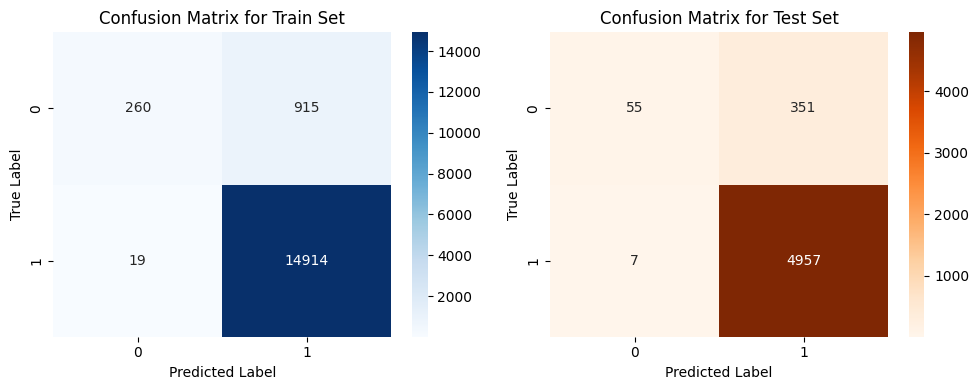

In [27]:
### Model Re-training (0.5 mark)
'''YOUR CODE HERE'''
multnom_combined = MultinomialNB()
multnom_combined.fit(X_train_combined, y_train)
y_train_pred = multnom_combined.predict(X_train_combined)
y_test_pred = multnom_combined.predict(X_test_combined)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='binary')
recall_train = recall_score(y_train, y_train_pred, average='binary')
roc_auc_train = roc_auc_score(y_train, multnom_combined.predict_proba(X_train_combined)[:, 1])
print("Training Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"ROC_AUC: {roc_auc_train:.4f}")

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='binary')
recall_test = recall_score(y_test, y_test_pred, average='binary')
roc_auc_test = roc_auc_score(y_test, multnom_combined.predict_proba(X_test_combined)[:, 1])
print("-"*10)
print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"ROC_AUC: {roc_auc_test:.4f}")

cm_combined_train = confusion_matrix(y_train, y_train_pred)
cm_combined_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.ravel()

sns.heatmap(cm_combined_train, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix for Train Set")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_combined_test, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix for Test Set")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [28]:
# Calculting F1 score for dataframe with only 'text' vs this new combined dataframe
# Recall metrics from dataframe with 'text' information only:
# ----------
# Test Metrics:
# Accuracy: 0.9356
# Precision: 0.9355
# Recall: 0.9996
# ROC_AUC: 0.9500

# I will only calculate the F1 score for test data since I want to see how well the model generalises to unseen data
precision_text_only = 0.9355
recall_text_only = 0.9996
f1_score_text_only = (2 * precision_text_only * recall_text_only) / (precision_text_only + recall_text_only)
print(f"F1 score for dataframe with text features: {f1_score_text_only:.4f}")

precision_combined = 0.9368
recall_combined = 0.9984
f1_score_combined = (2 * precision_combined * recall_combined) / (precision_combined + recall_combined)
print(f"F1 score for dataframe with text and product features: {f1_score_combined:.4f}")

F1 score for dataframe with text features: 0.9665
F1 score for dataframe with text and product features: 0.9666


#### Your explanation:
The feature `product` is not helpful. When we compare the accuracy and precision, the feature `product` increases the accuracy and precision very marginally (less than 0.01). The latter also resulted in a very marginal decrease (less than 0.1) in recall and roc_auc. <br>
Ultimately, when I used the F1 score to compare their performance, where F1 score is a balance between precision and recall, there was only a 0.0001 difference which is negligible. Hence `product` is not helpful.

### Task 2.11 Curve Plot (**0.5 Mark**)
Plot the ROC curve of the Naive Bayes classifiers trained using
- only the `text`  text feature (from task 2.3)
- both the `text` feature (from task 2.3) and `product` product feature (from task 2.8)

* **hint**: Check [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html). A reference plot is provided on the website. You don't need to follow the exact style of the reference plot.


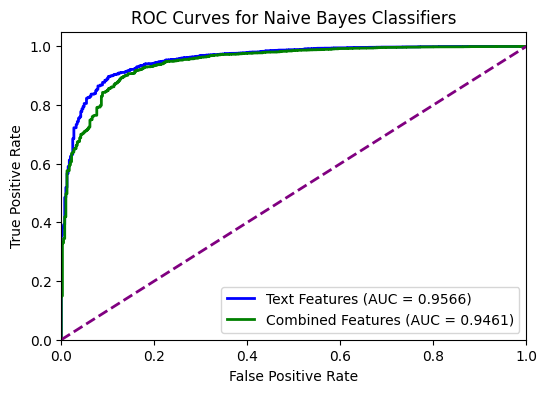

In [29]:
### Curve Plot (0.5 mark)
'''YOUR CODE HERE'''
from sklearn.metrics import roc_curve, auc

y_pred_proba_text = multnom.predict_proba(X_test_tfidf)[:, 1]
fpr_text, tpr_text, _ = roc_curve(y_test, y_pred_proba_text)
roc_auc_text = auc(fpr_text, tpr_text)
y_pred_proba_combined = multnom_combined.predict_proba(X_test_combined)[:, 1]
fpr_combined, tpr_combined, _ = roc_curve(y_test, y_pred_proba_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

plt.figure(figsize=(6, 4))
plt.plot(fpr_text, tpr_text, color='blue', lw=2, label=f'Text Features (AUC = {roc_auc_text:.4f})')
plt.plot(fpr_combined, tpr_combined, color='green', lw=2, label=f'Combined Features (AUC = {roc_auc_combined:.4f})')

plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes Classifiers')
plt.legend(loc="lower right")
plt.show()